In [2]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (12.0, 12.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'



In [32]:
data = {}
funs = ["BALD","MEAN_STD","RANDOM","VAR_RATIOS","MAX_ENTROPY"]
limited_vr = funs #["VAR_RATIOS","RANDOM"]
train = {}
val = {}
test = {}
train_accuracy= {}
train_loss= {}
test_accuracy = {}
test_loss = {}
val_accuracy = {}
val_loss = {}
for x in ["test","train","val"]:
    data[x] = {}
    for y in ["acc","loss"]:
        if x == "train" and y == "acc":
            continue 
        data[x][y] = {}
        for z in limited_vr:
            data[x][y][z] = np.load("final_run_1/"+x+"_"+y+"_"+z+".npy")
#             data[x][y][z] = np.load("ultimate_run/"+x+"_"+y+"_"+z+".npy")
            data[x][y][z] += np.load("final_run_2/"+x+"_"+y+"_"+z+".npy")
            data[x][y][z] += np.load("final_run_3/"+x+"_"+y+"_"+z+".npy")
            data[x][y][z]/=3
            


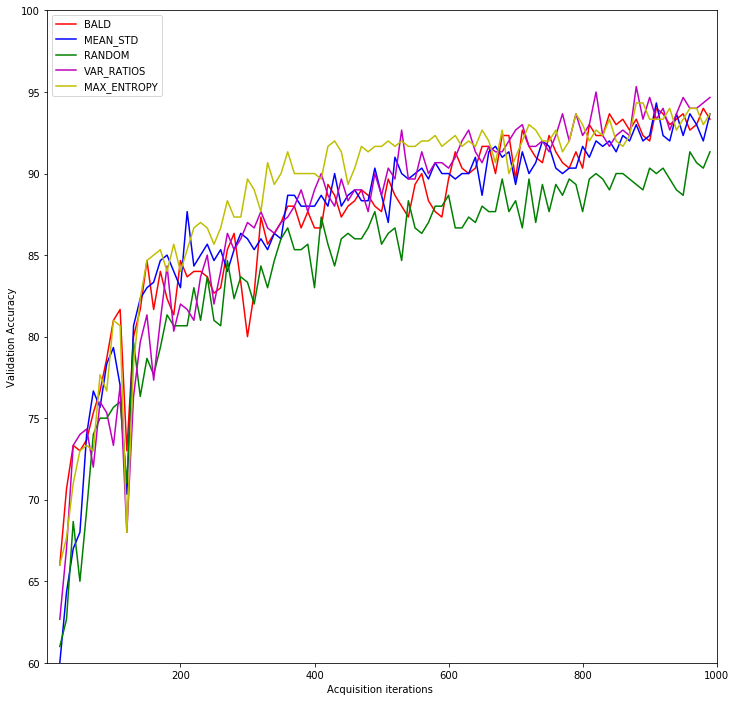

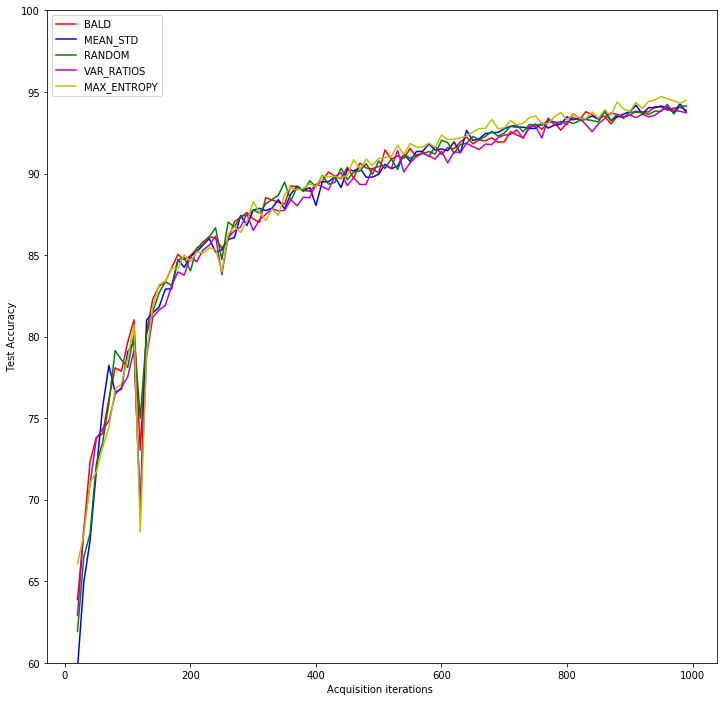

In [36]:
colors = ["r","b","g","m","y"]
x = np.array(range(2,100))
Queries = np.arange(20, 1000, 10)


for idx,z in enumerate(limited_vr):
    plt.plot(Queries,np.array(data["val"]["acc"][z]),colors[idx],label = z)
plt.ylabel('Validation Accuracy')
plt.legend(loc='upper left')

plt.xlabel ('Acquisition iterations ')
plt.xlim(1,1000)
plt.ylim(60,100)

plt.show()


colors = ["r","b","g","m","y"]
x = np.array(range(2,100))


for idx,z in enumerate(limited_vr):
#     if not (idx == 1 or  idx == 2 ):
#         continue
        
    plt.plot(Queries,np.array(data["test"]["acc"][z]),colors[idx],label = z)
plt.ylabel('Test Accuracy')
plt.legend(loc='upper left')

plt.xlabel ('Acquisition iterations ')
plt.ylim(60,100)

plt.show()
